<a href="https://colab.research.google.com/github/Fadi-Asfour/salary-prediction-/blob/main/salary%20predictio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler#MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_recall_curve,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

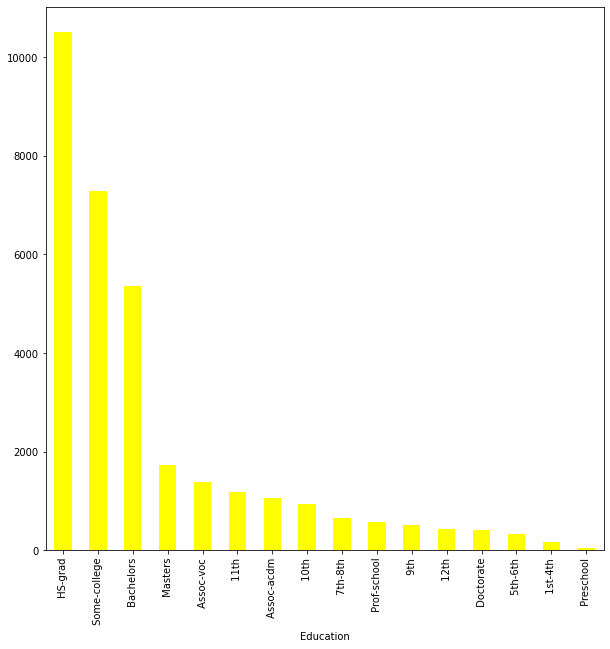

In [ ]:
plt.figure(figsize=(10,10))
df['education'].value_counts().plot(kind='bar', color = "yellow")
plt.xlabel("Education")
plt.show()

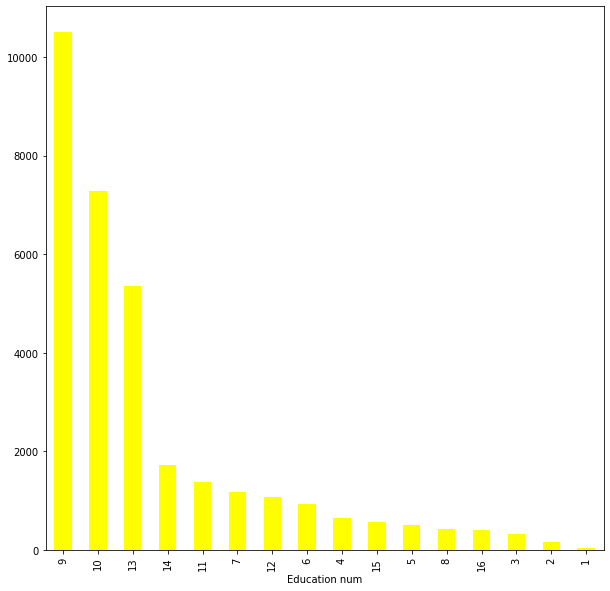

In [ ]:
plt.figure(figsize=(10,10))
df['education-num'].value_counts().plot(kind='bar', color = "yellow")
plt.xlabel("Education num")
plt.show()

In [ ]:
df.drop('education' ,axis = 1 , inplace=True)
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


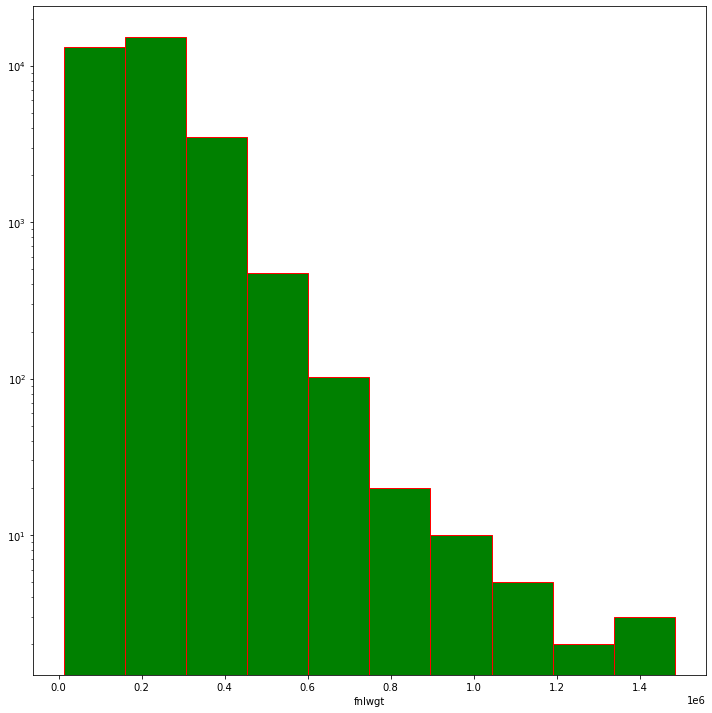

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df.fnlwgt, edgecolor="red", color="green", log=True)
plt.tight_layout()
plt.xlabel("fnlwgt")
plt.show()

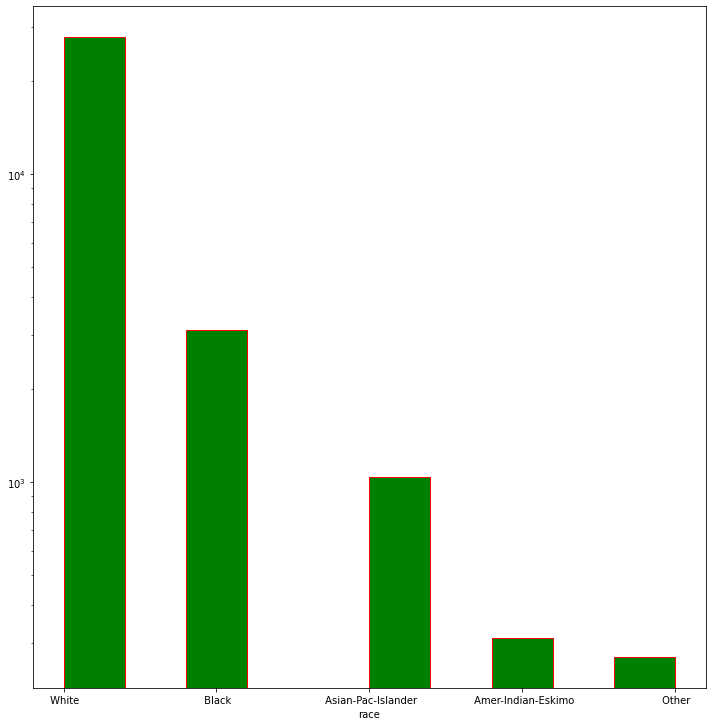

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df.race, edgecolor="red", color="green", log=True)
plt.tight_layout()
plt.xlabel("race")
plt.show()

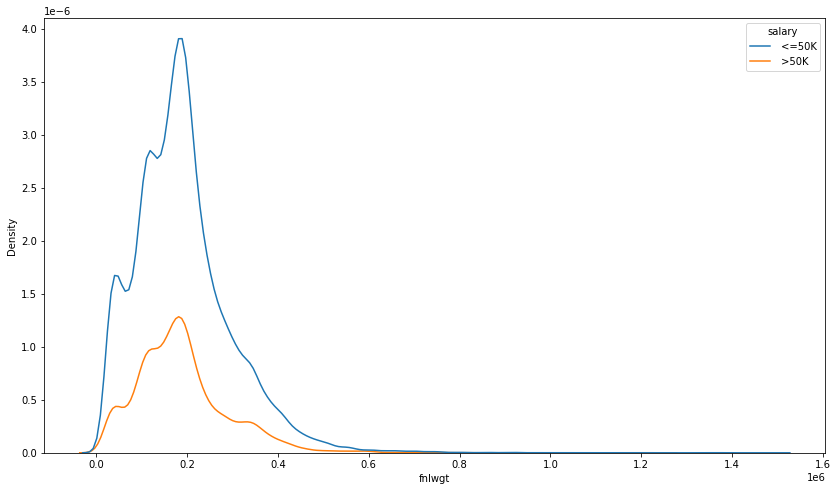

In [ ]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'fnlwgt' ,hue='salary')
plt.show()

In [ ]:

df = df.drop('fnlwgt', axis=1)
df


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:

l = LabelEncoder()
l.fit(df['salary'])

LabelEncoder()

In [ ]:
df['salary_res'] = l.transform(df[['salary']])
df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_res
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [ ]:
df = df.drop('salary', axis=1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_res
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:

l = LabelEncoder()
l.fit(df['sex'])
df['sex_res'] = l.transform(df[['sex']])
df = df.drop('sex', axis=1)

df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,workclass,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary_res,sex_res
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,0,1


In [ ]:

e = OneHotEncoder(sparse=False)
res= e.fit_transform(df[['workclass','marital-status','race','occupation','relationship','native-country']])
res



array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
df = pd.get_dummies(df, columns=['workclass','marital-status','race','occupation','relationship','native-country'])
df

,age,education-num,capital-gain,capital-loss,hours-per-week,salary_res,sex_res,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.loc[:, df.columns != 'salary_res']
X
y=df['salary_res']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (26048, 90) (26048,)
Test set: (6513, 90) (6513,)


In [ ]:

clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)
clf

LogisticRegression(solver='liblinear')

In [ ]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_predict_prob = clf.predict_proba(X_test)
y_predict_prob

array([[0.81000301, 0.18999699],
       [0.738669  , 0.261331  ],
       [0.11478443, 0.88521557],
       ...,
       [0.93470978, 0.06529022],
       [0.99493447, 0.00506553],
       [0.99204436, 0.00795564]])

In [ ]:
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))

Accuracy of Logistic regression classifier on train set: 0.852080773955774
Accuracy of Logistic regression classifier on test set: 0.8515277138031629


In [ ]:

scaler = StandardScaler()#MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression().fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))

Accuracy of Logistic regression classifier on test set: 0.8528101965601965
Accuracy of Logistic regression classifier on test set: 0.8536772608628896


In [ ]:


target_names1 = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.90      4972
           1       0.72      0.61      0.66      1541

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [ ]:

np.set_printoptions(precision=2)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Salary dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Salary dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.81
Accuracy of RBF-kernel SVC on test set: 0.81


In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=7).fit(X_train_scaled, y_train)
print('Salary dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Salary dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.86
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.85


In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=14).fit(X_train_scaled, y_train)
print('Salary dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Salary dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.87
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.85


In [ ]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=17).fit(X_train_scaled, y_train)
print('Salary dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Salary dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.87
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.85


In [ ]:

y_predict = clf.predict(X_test_scaled)
# print('Micro-averaged precision = {:.2f} (treat instances equally)'
#       .format(precision_score(y_test , svm_predicted , average = 'micro')))
# f1_score(y_true, y_pred, average='macro')
# print('Macro-averaged precision = {:.2f} (treat classes equally)'
#       .format(precision_score(y_test , svm_predicted , average = 'macro')))

print('Micro-averaged f1 = {:.2f} '
      .format(f1_score(y_test , y_predict , average = 'micro')))
print('Macro-averaged f1 = {:.2f} '
      .format(f1_score(y_test , y_predict , average = 'macro')))

Micro-averaged f1 = 0.85 
Macro-averaged f1 = 0.78 


In [ ]:


svm = SVC(kernel = 'linear').fit(X_train, y_train)
svm_predicted  = svm.predict(X_test )
confusion  = confusion_matrix(y_test , svm_predicted )
df_cm = pd.DataFrame(confusion ,
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test ,
                                                                       svm_predicted )))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train , y_train )
svm_predicted  = svm.predict(X_test )
confusion  = confusion_matrix(y_test , svm_predicted )
df_cm = pd.DataFrame(confusion , index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test ,
                                                                    svm_predicted )))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
print(classification_report(y_test, svm_predicted))

In [ ]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test , svm_predicted , average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test , svm_predicted , average = 'macro')))

In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test , svm_predicted , average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test , svm_predicted , average = 'macro')))

In [ ]:


print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test , svm_predicted , average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test , svm_predicted , average = 'macro')))

In [ ]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test , svm_predicted , average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test , svm_predicted , average = 'macro')))

In [ ]:
# %matplotlib notebook
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn import datasets
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

clf=DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state = 3)

In [ ]:
params={'min_samples_split':[4,5,7,8]}

In [ ]:
cv=GridSearchCV(clf,params)

In [ ]:
clf.fit(X_train,y_train)
cv.fit(X_train,y_train)

In [ ]:
cv.best_score_

In [ ]:
y_predict=clf.predict(X_test)

In [ ]:

confusion_matrix(y_test,y_pred=y_predict)

In [ ]:
precision_recall_curve(y_test,y_predict)

In [ ]:
classification_report(y_test,y_predict)

In [ ]:
confusion_matrix(y_test,y_predict)

In [ ]:


# dataset = load_digits()
# X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier


# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier


# X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state = 3)

# clf = DecisionTreeClassifier().fit(X_train, y_train)

# print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))

In [ ]:
# df.nunique()

In [ ]:

# # df = df.drop('fnlwgt', axis=1)
# # df
# X = df.loc[:, df.columns != 'salary_res']
# X

In [ ]:
# from sklearn.preprocessing import StandardScaler#MinMaxScaler
# scaler = StandardScaler()#MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# # we must apply the scaling to the test set that we computed for the training set
# X_test_scaled = scaler.transform(X_test)



# clf = LogisticRegression().fit(X_train_scaled, y_train)

# print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train_scaled, y_train))
# print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))

In [ ]:
# from sklearn.metrics import classification_report

# target_names1 = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_test,y_predict))

In [ ]:
# from sklearn.metrics import classification_report

# target_names1 = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_test,y_predict))

In [ ]:
# from sklearn.preprocessing import StandardScaler#MinMaxScaler
# scaler = StandardScaler()#MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# # we must apply the scaling to the test set that we computed for the training set
# X_test_scaled = scaler.transform(X_test)



# clf = LogisticRegression().fit(X_train_scaled, y_train)

# print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
# print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))

In [ ]:
# from sklearn.metrics import classification_report

# target_names1 = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_test,y_predict))

In [ ]:
df

In [ ]:

clf = RandomForestClassifier(n_estimators = 200, criterion="gini", max_depth = 6)

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf.fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_pred, y_test))

In [ ]:

print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))

In [ ]:

clf = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))

In [ ]:

clf = RandomForestClassifier(n_estimators=150, max_features="auto",max_depth=18, random_state=44)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))

In [ ]:

clf = RandomForestClassifier(n_estimators=200,min_samples_split=3, min_samples_leaf=3,max_depth=18, random_state=44)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))

In [ ]:

clf = RandomForestClassifier(n_estimators=200,min_samples_split=3, min_samples_leaf=3,min_weight_fraction_leaf=0.2,max_depth=18, random_state=44)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))



In [ ]:

clf = RandomForestClassifier(n_estimators=200,min_samples_split=3, min_samples_leaf=3,min_weight_fraction_leaf=0.2,max_depth=18, random_state=44)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(recall_score(y_pred, y_test))
print('Accuracy  on train set:' , clf.score(X_train, y_train))
print('Accuracy  on test set:' , clf.score(X_test, y_test))

